<a href="https://colab.research.google.com/github/DevCarlosRamos/proyect-melanoma-python-tensorflow-IA/blob/main/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTAR IMAGENES DE LESIONES
import cv2 as cv2
import numpy as np
from PIL import Image
import os

#RUTA DE LA CARPETA DE IAMAGENES EN DRIVE
dir_drive = "drive/MyDrive/images_lesion/"
dir_path = os.listdir(dir_drive)

#ARRAYS DE DATOS
images_train = []; labels_train = [] # IMAGENES DE ENTRENAMIENTO
images_valid = []; labels_valid = [] # IMAGENES DE VALIDACIÓN
images_test = []; labels_test = [] # IMAGENES DE TEST

#RECORRE CARPETA TEST, TRAIN, VALID
for typeCarpeta in dir_path:
  TypeData = os.listdir(dir_drive + typeCarpeta)

  #RECORRE CARPETA MELANOMA, seborrheic_keratosis, NEVUS
  for typedir in TypeData:
    Imagenes = os.listdir(dir_drive + typeCarpeta + '/' + typedir)

    #RECORRE IMAGEN POR IMAGEN
    for imagen in Imagenes:
      url = dir_drive + typeCarpeta + '/' + typedir +'/'+imagen
      img = cv2.imread(url)
      #COLOR DE IMAGENES
      arr = Image.fromarray(img,'RGB')
      #TAMAÑO EN PIXELES DE LA IMAGEN
      img_arr = arr.resize((100,100))

      if(typeCarpeta == "train"):
        labels_train.append(typedir)
        images_train.append(np.array(img_arr))
      elif(typeCarpeta == "test"):
        labels_test.append(typedir)
        images_test.append(np.array(img_arr))
      else:
        labels_valid.append(typedir)
        images_valid.append(np.array(img_arr))



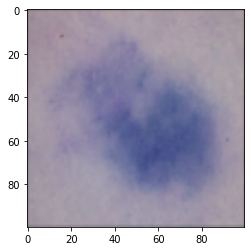

In [ ]:
#MOSTRAR UNA IMAGEN

import matplotlib.pyplot as plt

for images in images_train[0:1]:
    plt.imshow(images)

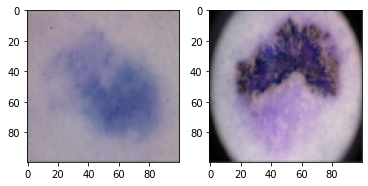

In [ ]:
#MOSTRAR 2 IMAGENES


i=0
for images in images_train[0:2]:

  plt.subplot(1,2, i+1)
  plt.imshow(images)
  i= i+1

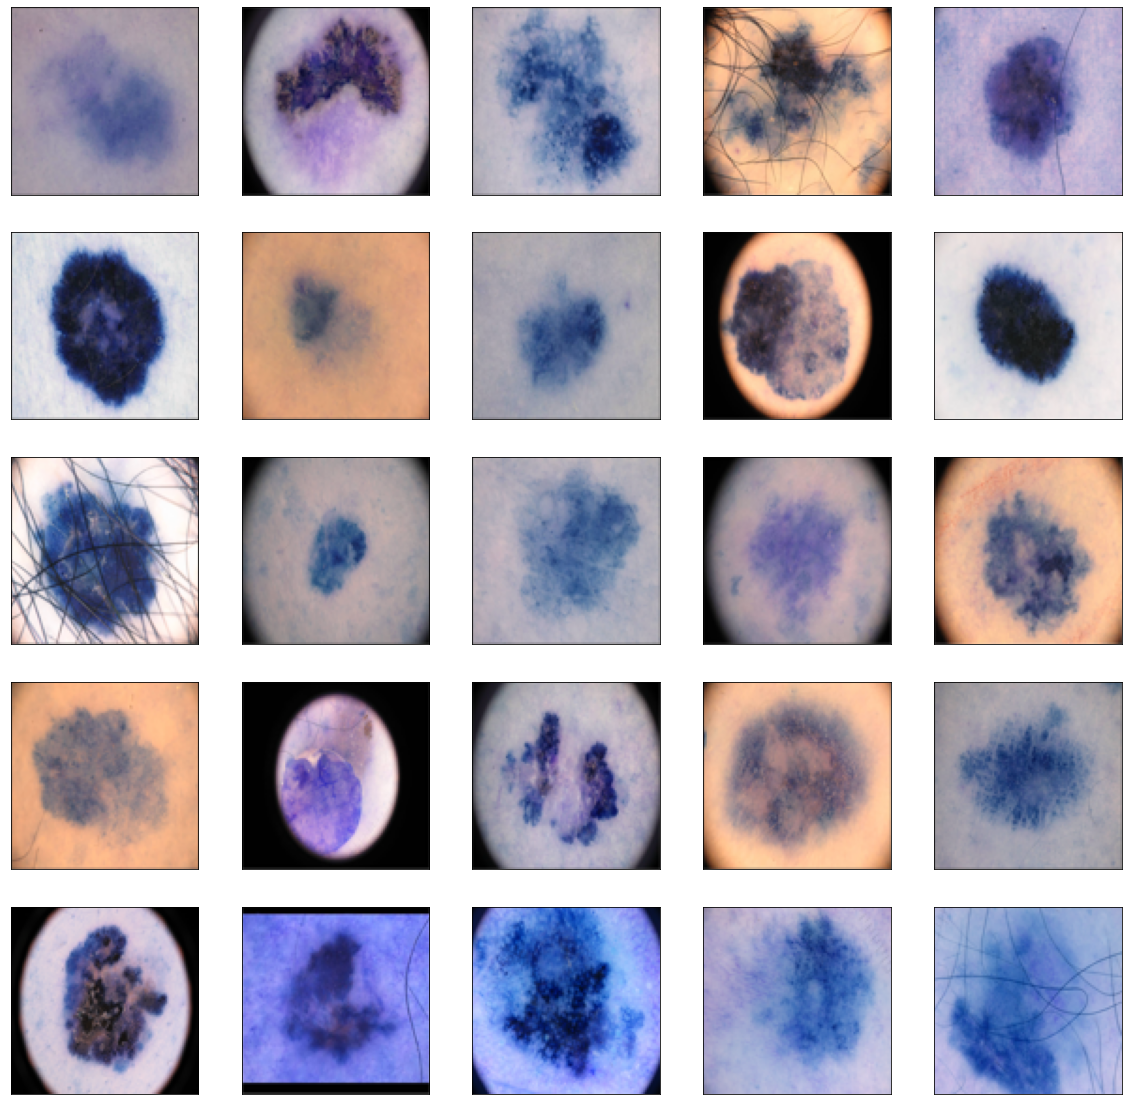

In [ ]:
#TAMAÑO DE LAS IMAGENES
plt.figure(figsize=(20,20))

#MOSTRAR VARIAS IMAGENES
i=0
for images in images_train[0:25]:

  #MATRIZ
  plt.subplot(5,5, i+1)
  #QUITAR NUMEROS
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(images)
  i= i+1

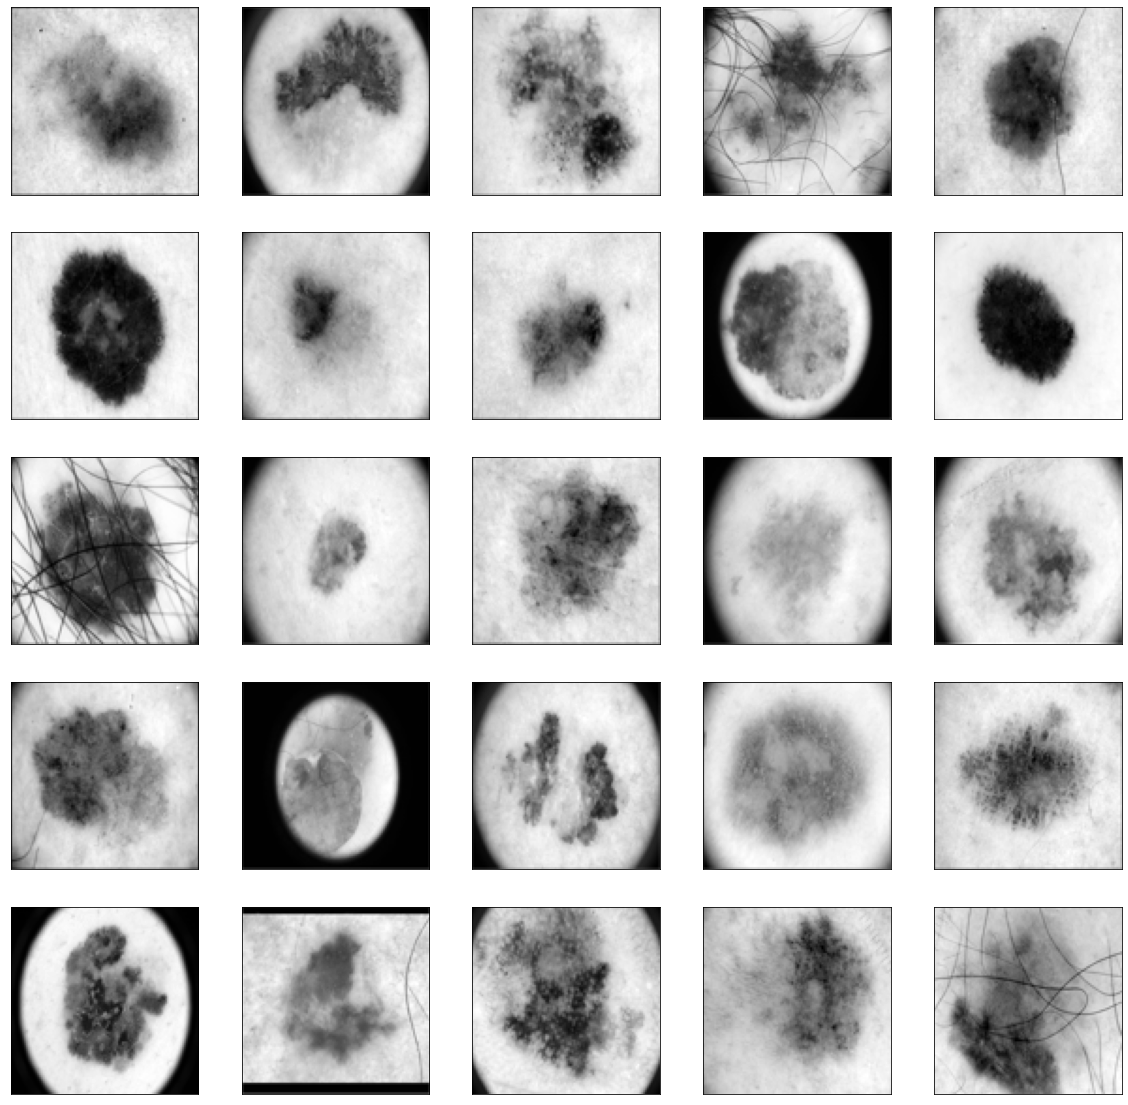

In [ ]:
#-----MODIFICACIONES EN LAS IMAGENES PARA MEJORAR EL ENTREANMIENTO
#TAMAÑO DE LAS IMAGENES 
plt.figure(figsize=(20,20))

#--- PONER EL MISMO TAMAÑO A TODOS
TAMANO_IMG=100

#MOSTRAR VARIAS IMAGENES
for i,imagen in enumerate(images_train[0:25]):
#--- PONER EL MISMO TAMAÑO A TODOS
  imagen = cv2.resize(imagen, (TAMANO_IMG,TAMANO_IMG))
#--- PONER A BLANCO Y NEGRO
  imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
  #MATRIZ
  plt.subplot(5,5, i+1)
  #QUITAR NUMEROS
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(imagen, cmap='gray')

In [ ]:
#CAMBIAR IMAGENES - NUEVOS ARRAYS
images_train_mod = []

for imagen in images_train:
#--- PONER EL MISMO TAMAÑO A TODOS
  imagen = cv2.resize(imagen, (TAMANO_IMG,TAMANO_IMG))
#--- PONER A BLANCO Y NEGRO
  imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
  #CAMBIAR TAMAÑO A 100, 100, 1 POR QUE ESTA EN BLANCO Y NEGRO
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1)
  
  #AGREGAMOS LAS NUEVAS IMAGENES TRANFORMADAS
  images_train_mod.append(imagen)

In [ ]:
#VER TODOS LOS VALORES DE UN PIXEL DE UNA IMAGEN
images_train_mod[0]

array([[[122],
        [131],
        [132],
        ...,
        [140],
        [139],
        [130]],

       [[135],
        [148],
        [148],
        ...,
        [159],
        [159],
        [145]],

       [[137],
        [149],
        [146],
        ...,
        [158],
        [158],
        [144]],

       ...,

       [[142],
        [155],
        [152],
        ...,
        [160],
        [160],
        [146]],

       [[142],
        [155],
        [154],
        ...,
        [159],
        [159],
        [149]],

       [[128],
        [135],
        [136],
        ...,
        [141],
        [141],
        [133]]], dtype=uint8)

In [ ]:
#CANTIDAD DE IMAGENES DE ENTRENAMIENTO
len(images_train_mod)

2000

In [ ]:
#NORMALIZACION PARA MEJORAR EL ENTRENAMIENTO
import numpy as np
images_train_mod = np.array(images_train_mod).astype(float)/255

In [ ]:
images_train_mod.shape

NameError: ignored

In [ ]:
#VERIFICACION DE NORMALIZACIÓN
images_train_mod

array([[[[0.47843137],
         [0.51372549],
         [0.51764706],
         ...,
         [0.54901961],
         [0.54509804],
         [0.50980392]],

        [[0.52941176],
         [0.58039216],
         [0.58039216],
         ...,
         [0.62352941],
         [0.62352941],
         [0.56862745]],

        [[0.5372549 ],
         [0.58431373],
         [0.57254902],
         ...,
         [0.61960784],
         [0.61960784],
         [0.56470588]],

        ...,

        [[0.55686275],
         [0.60784314],
         [0.59607843],
         ...,
         [0.62745098],
         [0.62745098],
         [0.57254902]],

        [[0.55686275],
         [0.60784314],
         [0.60392157],
         ...,
         [0.62352941],
         [0.62352941],
         [0.58431373]],

        [[0.50196078],
         [0.52941176],
         [0.53333333],
         ...,
         [0.55294118],
         [0.55294118],
         [0.52156863]]],


       [[[0.10588235],
         [0.0627451 ],
         [0.06

In [ ]:
labels_train = np.array(labels_train)
labels_train

array(['melanoma', 'melanoma', 'melanoma', ..., 'seborrheic_keratosis',
       'seborrheic_keratosis', 'seborrheic_keratosis'], dtype='<U20')

In [ ]:
#RED NEURONAL - 3 MODELOS

In [ ]:
import tensorflow as tf

#PRIMER MODELO - 2 capas 
modelDenso = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(100,100,1)), #capa de entrada recibiendo los 10 mil pixeles
    tf.keras.layers.Dense(150, activation='relu'), #capa oculta 1 -- densa 150 neuronas 
    tf.keras.layers.Dense(150, activation='relu'), #capa oculta 2 -- densa 150 neuronas 
    tf.keras.layers.Dense(3, activation='softmax'), #capa de salida -- 3 neuronas
])

#SEGUNDO MODELO - RED CONVULUCIONAL
modelCNN = tf.keras.models.Sequential([
    #**********Capa 1 convulucional************
    # 32 FILTROS
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),#AGRUPACION MAXIMA
    #**********Capa 2 convulucional************
    # 64 FILTROS
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),#AGRUPACION MAXIMA
    #**********Capa 3 convulucional************
    # 128 FILTROS
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),#AGRUPACION MAXIMA

    tf.keras.layers.Flatten(),
  #SOLO 1 CAPA DENSA DE 100 NEURONAS
  tf.keras.layers.Dense(100, activation='relu'),
  #CAPA DENSA DE SALIDA
  tf.keras.layers.Dense(3, activation='softmax')
])

#TERCER MODELO - RED CONVUCIONAL
modeloCNN2 = tf.keras.models.Sequential([
  #**********Capa 1 convulucional************
    # 32 FILTROS
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),#AGRUPACION MAXIMA
    #**********Capa 2 convulucional************
    # 64 FILTROS
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),#AGRUPACION MAXIMA
    #**********Capa 3 convulucional************
    # 128 FILTROS
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),#AGRUPACION MAXIMA

    tf.keras.layers.Dropout(0.5), #AGRAGAMOS UN DROPOUT
    tf.keras.layers.Flatten(),
  #SOLO 1 CAPA DENSA DE 100 NEURONAS
  tf.keras.layers.Dense(250, activation='relu'), # UTILIZAMOS 250 NEURONAS
  #CAPA DENSA DE SALIDA
  tf.keras.layers.Dense(3, activation='softmax')
])

"""modelDenso.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modelCNN.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

modeloCNN2.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])"""

modelDenso.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    metrics=['accuracy'])


In [ ]:


historial = modelDenso.fit(images_train_mod,
                           labels_train,
                       epochs=5)

Epoch 1/5


UnimplementedError: ignored